<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/shopee_tes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
# zf = zipfile.ZipFile('/content/drive/My Drive/shopee/shopee-product-detection-dataset.zip') 

In [ ]:
!unzip /content/drive/My\ Drive/shopee/shopee-product-detection-dataset.zip -d .

In [18]:
!mkdir /content/train/train_0/

In [19]:
!cp -r /content/train/train/00 /content/train/train_0/

In [20]:
!cp -r /content/train/train/01 /content/train/train_0/

In [17]:
# !rm -rf /content/train/train_0/

In [6]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [27]:
total_file = 0
for i in range(0, 42):
    if i < 10:
        i = '0' + str(i)
    total_file += len(os.listdir(f'/content/train/train/{i}'))
    print(i, len(os.listdir(f'/content/train/train/{i}')))

00 2683
01 2703
02 2687
03 2703
04 2703
05 2641
06 2641
07 2661
08 2700
09 2698
10 2673
11 1843
12 2691
13 2682
14 2685
15 2632
16 2665
17 1553
18 2104
19 2679
20 2654
21 2598
22 2623
23 2540
24 2705
25 2692
26 2684
27 2702
28 2561
29 2138
30 2705
31 2677
32 2157
33 573
34 2599
35 2658
36 2686
37 1725
38 2673
39 2678
40 2681
41 2662


In [25]:
total_file

105398

In [32]:
print(len(os.listdir('/content/test/test')))

12192


In [30]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [31]:
print(len(train_df))
print(len(test_df))

105392
12186


In [29]:
train_df.category.value_counts().sort_index()

0     2683
1     2702
2     2687
3     2703
4     2703
5     2641
6     2641
7     2660
8     2700
9     2698
10    2672
11    1843
12    2691
13    2682
14    2684
15    2632
16    2665
17    1553
18    2103
19    2679
20    2653
21    2598
22    2623
23    2540
24    2705
25    2692
26    2684
27    2702
28    2561
29    2138
30    2705
31    2677
32    2157
33     573
34    2599
35    2658
36    2686
37    1725
38    2673
39    2678
40    2681
41    2662
Name: category, dtype: int64

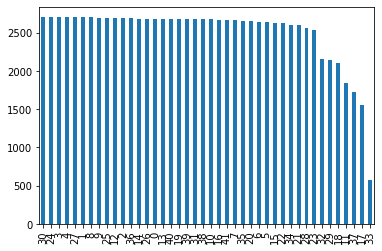

In [22]:
train_df.category.value_counts().plot.bar()

In [32]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # The fifth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    # The fifth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 33, 33, 64)       

In [34]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/train/train_0/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 5385 images belonging to 2 classes.


In [36]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 8s 1s/step - loss: 3.7102 - accuracy: 0.5352
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 0.6946 - accuracy: 0.5117
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.6934 - accuracy: 0.5156
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.6924 - accuracy: 0.5234
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.6935 - accuracy: 0.5186
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.6941 - accuracy: 0.4717
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 0.6930 - accuracy: 0.5166
Epoch 8/15
8/8 [==============================] - 8s 1s/step - loss: 0.6933 - accuracy: 0.5078
Epoch 9/15
8/8 [==============================] - 8s 945ms/step - loss: 0.6919 - accuracy: 0.5282
Epoch 10/15
8/8 [==============================] - 8s 1s/step - loss: 0.7158 - accuracy: 0.5244
Epoch 11/15
8/8 [=============================